# Dataset Analysis

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Training data 

Loading training dataset and preview of first 5 samples:

In [2]:
train_data = pd.read_csv("datasets/fashion-mnist_train.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [4]:
categorical_feats = np.concatenate((train_data.dtypes[train_data.dtypes == "int64"].index, train_data.dtypes[train_data.dtypes == "object"].index))
print("Number of categorical features:", len(categorical_feats))

Number of categorical features: 785


In [5]:
print('Shape:', train_data.shape)
print('Missing values:', train_data.isnull().sum().sum())

Shape: (60000, 785)
Missing values: 0


Separating data into two datasets X_train and y_train, where y is a dataset consisted of classes of all samples, and X is a dataset that has all the pixel values for each sample. Checking numerical representation of each class in data.

In [6]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
print('Shape of X:', X_train.shape)
print('Classes in y:', y_train.unique())
print('Representation of each class in X_train:', y_train.groupby(by=y_train).count())

Shape of X: (60000, 784)
Classes in y: [2 9 6 0 3 4 5 8 7 1]
Representation of each class in X_train: label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64


Turning pixel values into pictures for the first 9 samples 

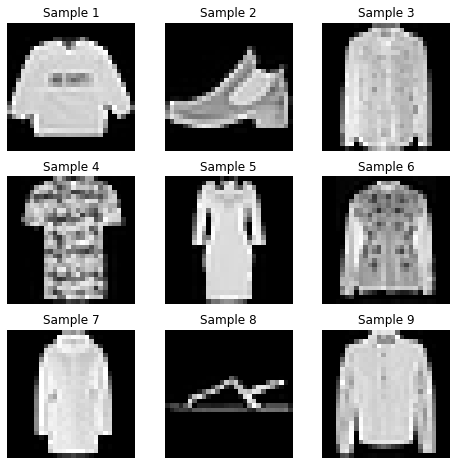

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axs.flatten()):
    arr = X_train.iloc[i,:].to_numpy()
    arr = arr.reshape(28,28)
    arr = arr.astype(np.uint8)
    img = Image.fromarray(arr, "L")

    #img.save("images/Sample" + str(i) + ".png")

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Sample {i+1}")
    ax.axis("off")

plt.show()

### Test data

Loading test dataset and preview of first 5 samples:

In [8]:
test_data = pd.read_csv("datasets/fashion-mnist_test.csv")
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print('Shape:', test_data.shape)
print('Missing values:', test_data.isnull().sum().sum())

Shape: (10000, 785)
Missing values: 0


Separating data into two datasets X_test and y_test, where y is a dataset consisted of classes of all samples, and X is a dataset that has all the pixel values for each sample. Checking numerical representation of each class in data.

In [10]:
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]
print('Shape of X:', X_test.shape)
print('Classes in y:', y_test.unique())
print('Representation of each class in X_test:', y_test.groupby(by=y_test).count())

Shape of X: (10000, 784)
Classes in y: [0 1 2 3 8 6 5 4 7 9]
Representation of each class in X_test: label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64


Dictionary of numbers and corresponding names of classes

In [11]:
clothing_dictionary = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

dictionary = pd.DataFrame(clothing_dictionary)
dictionary.columns = ['Clothing']

dictionary

,Clothing
0,T-shirt
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


A graph representing how many non-zero values there are for each pixel in training set:

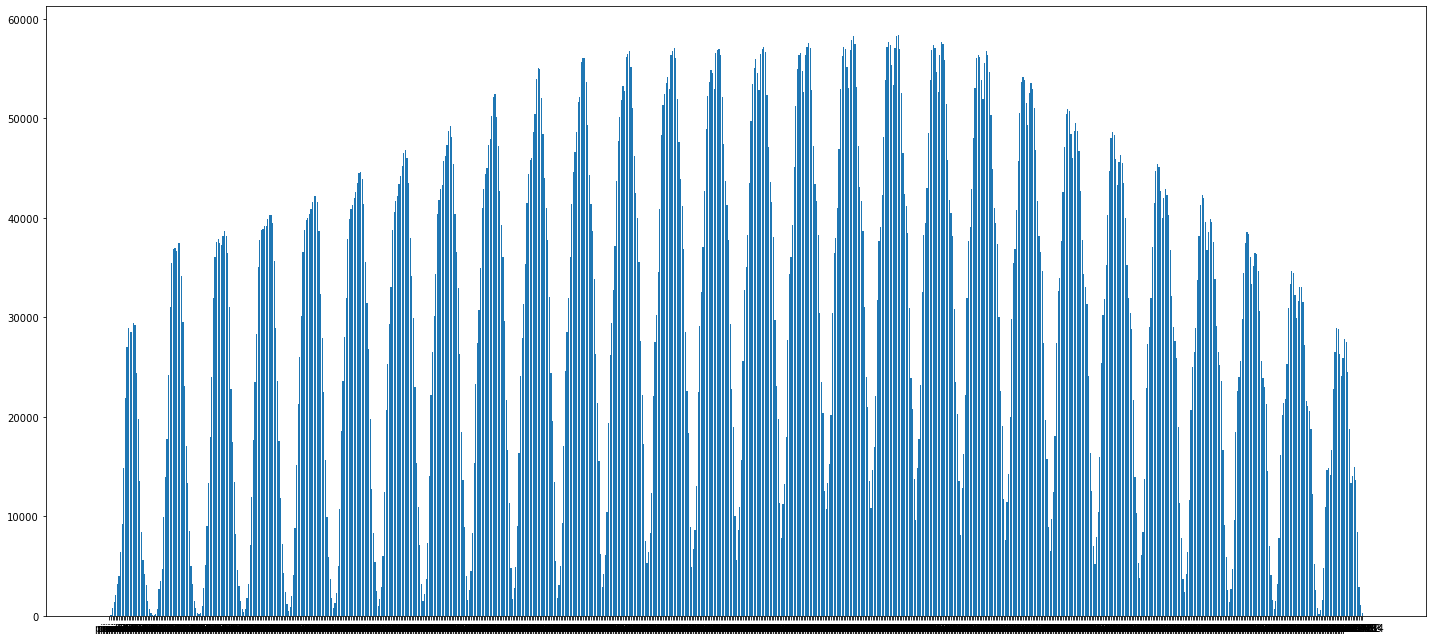

In [12]:
columns = X_train.columns
rows = np.count_nonzero(X_train, axis=0)

plt.figure(figsize=(20,9))
plt.xticks(ticks = None)
plt.bar(columns, rows, align='center')
plt.tight_layout()
plt.show()

## Data visualization with Dimensionality reduction

### PCA - method of representation

data standardization

In [13]:
s = StandardScaler()
X_std = s.fit_transform(X_train)

In [14]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

Text(0.5, 1.0, 'PCA of MNIST dataset')

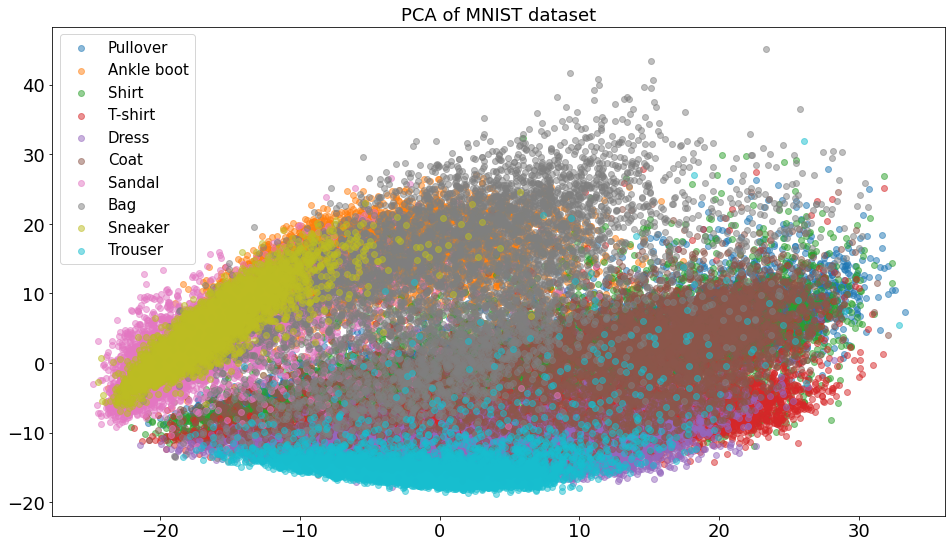

In [15]:
plt.figure(figsize=(16,9))

for i in  y_train.unique():
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], alpha = .5, label = clothing_dictionary[i])
plt.tick_params(labelsize=18)
plt.legend(fontsize=15, loc='upper left')
plt.title('PCA of MNIST dataset', fontsize = 18)

#plt.savefig("images/PCAReduction.png")

### LDA - method of classification

In [16]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_std, y_train)
X_lda = lda.transform(X_std)

Text(0.5, 1.0, 'LDA of MNIST dataset')

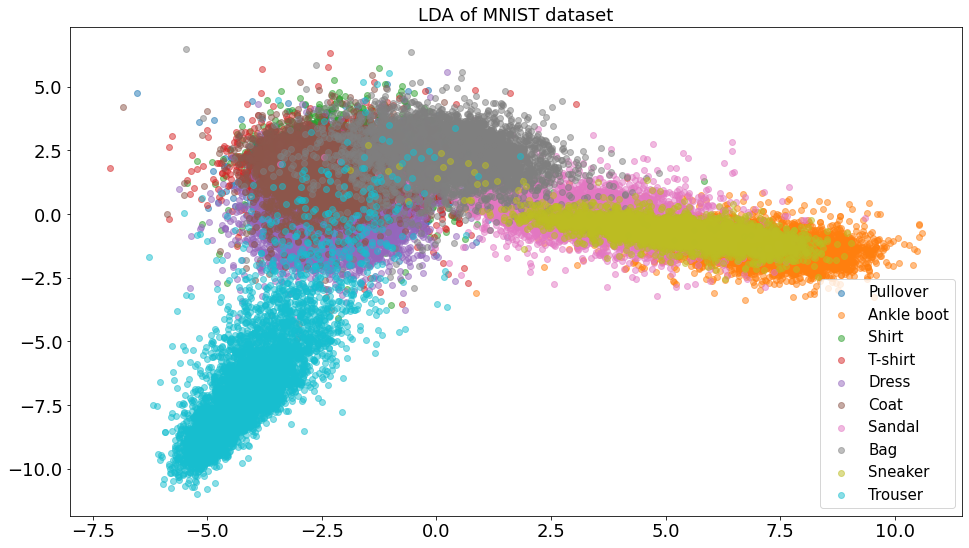

In [17]:
plt.figure(figsize=(16,9))

for i in y_train.unique():
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], alpha=.5, label = clothing_dictionary[i])
plt.tick_params(labelsize=18)
plt.legend(fontsize=15, loc='lower right')
plt.title('LDA of MNIST dataset', fontsize = 18)

#plt.savefig("images/LDAReduction.png")